In [1]:
import argparse, json, time, random
import hashlib, torch, math, pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from task_and_training import *

Occasional outlieas are removed when the network did not learn


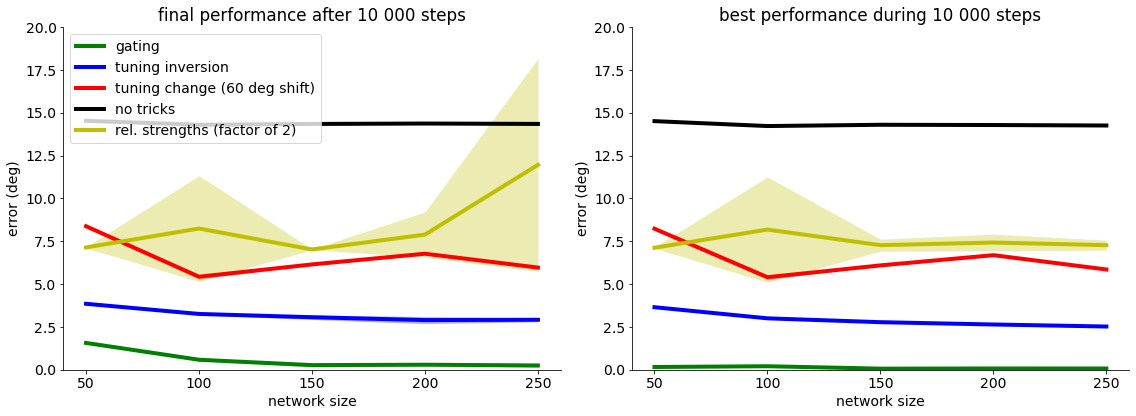

In [55]:
dim_recurrents = [50, 100, 150, 200, 250]
randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(dim_recurrents))
final_errors = torch.zeros(len(randoms), len(dim_recurrents))


fig = plt.figure(figsize=(16, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

def _plot(network, label, color):
    for i, dim_recurrent in enumerate(dim_recurrents):
        for j, random in enumerate(randoms):
            directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_r{random}/"
            with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                js = json.load(f)
            final_errors[j, i] = js["errors"][2]
            best_errors[j, i] = js["errors"][6] 
    # outliers
    if network == "gating":
        final_errors[3, 3] = float('nan')
        best_errors[3, 3] = float('nan')
    if network == "relstrengths":
        final_errors[final_errors>30] = float('nan')
    # plot
    mean = torch.nanmean(best_errors, dim=0) 
    sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
    ax_b.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_b.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)
    mean = torch.nanmean(final_errors, dim=0) 
    sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
    ax_f.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_f.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)

_plot("gating", "gating", "g")
_plot("inversion", "tuning inversion", "b")
_plot("rchange", "tuning change (60 deg shift)", "r")
_plot("notricks", "no tricks", "k")
_plot("relstrengths", "rel. strengths (factor of 2)", "y")
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"network size")
ax_b.set_xlabel(f"network size")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(dim_recurrents)
ax_b.set_xticks(dim_recurrents)
ax_f.set_ylim(0, 20)
ax_b.set_ylim(0, 20)
plt.tight_layout()
print("Occasional outlieas are removed when the network did not learn")
plt.show()

In [7]:
dim_recurrent = 100

randoms = [1, 2, 3, 4, 5]
best_errors = torch.zeros(len(randoms), len(dim_recurrents))
final_errors = torch.zeros(len(randoms), len(dim_recurrents))


fig = plt.figure(figsize=(16, 6))
plt.rc('font', **{'family': 'DejaVu Sans', 'weight': 'normal', 'size': 14})
ax_f = fig.add_subplot(1, 2, 1)
ax_b = fig.add_subplot(1, 2, 2)

def _plot(network, label, color):
    for i, dim_recurrent in enumerate(dim_recurrents):
        for j, random in enumerate(randoms):
            directory = f"data/hd{network}CTRNN_2ORI1O_dr{dim_recurrent}_n{0.1}_r{random}/"
            with open(f"{directory}info.json", 'r', encoding='utf-8') as f:
                js = json.load(f)
            final_errors[j, i] = js["errors"][2]
            best_errors[j, i] = js["errors"][6] 
    # outliers
    if network == "gating":
        final_errors[3, 3] = float('nan')
        best_errors[3, 3] = float('nan')
    if network == "relstrengths":
        final_errors[final_errors>30] = float('nan')
    # plot
    mean = torch.nanmean(best_errors, dim=0) 
    sd = (torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5
    ax_b.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_b.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)
    mean = torch.nanmean(final_errors, dim=0) 
    sd = (torch.nanmean(final_errors**2, dim=0)-mean**2)**0.5
    ax_f.fill_between(dim_recurrents, mean-sd, mean+sd, color=color, alpha=0.3, linewidth=0)
    ax_f.plot(dim_recurrents, mean, "-", linewidth=4, label=label, color=color)

_plot("gating", "gating", "g")
_plot("inversion", "tuning inversion", "b")
_plot("rchange", "tuning change", "r")
_plot("notricks", "no tricks", "k")
_plot("relstrengths", "rel. strengths (factor of 2)", "y")
    
#if show_line: ax.axhline(y=0.0, color='r', linestyle='--', linewidth=3)
#ax.set_ylim(-ylim, ylim)
#ax.set_xlim(-90, 90)
ax_f.set_title(f"final performance after 10 000 steps")
ax_b.set_title(f"best performance during 10 000 steps")
ax_f.set_xlabel(f"network size")
ax_b.set_xlabel(f"network size")
ax_f.set_ylabel("error (deg)")
ax_b.set_ylabel("error (deg)")
ax_f.spines['top'].set_visible(False)
ax_f.spines['right'].set_visible(False)
ax_b.spines['top'].set_visible(False)
ax_b.spines['right'].set_visible(False)
ax_f.legend(loc=2)
#ax_b.legend(loc=1)
ax_f.set_xticks(dim_recurrents)
ax_b.set_xticks(dim_recurrents)
ax_f.set_ylim(0, 20)
ax_b.set_ylim(0, 20)
plt.tight_layout()
plt.show()

tensor([[ 0.1402,  0.2197,  0.0697,  0.0832,  0.0631],
        [ 0.1703,  0.2422,  0.0406,  0.0802,  0.0554],
        [ 0.1419,  0.1468,  0.0630,  0.0869,  0.0865],
        [ 0.1967,  0.2153,  0.0952, 22.9409,  0.0700],
        [ 0.1668,  0.2161,  0.0696,  0.0610,  0.0994]])

In [20]:
(torch.nanmean(best_errors**2, dim=0)-mean**2)**0.5

tensor([0.0208, 0.0321, 0.0174, 0.0100, 0.0160])

In [13]:
torch.nansum(best_errors**2, dim=0)

tensor([0.1353, 0.2215, 0.0244, 0.0246, 0.0293])

In [16]:
mean**2

tensor([0.0266, 0.0433, 0.0046, 0.0061, 0.0056])